In [12]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

In [13]:
from qiskit.visualization import plot_histogram
from qiskit import Aer
import numpy as np
from qiskit import* 

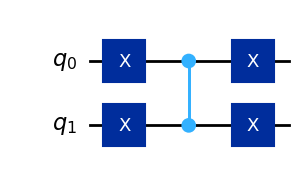

In [14]:
# Applies Oracle to the Grimoire 0
def first_grimoire():
    circ = QuantumCircuit(2)
    circ.x(0)
    circ.x(1)
    circ.cz(0,1)
    circ.x(0)
    circ.x(1)
    
    return circ

circ = first_grimoire()
circ.draw(output='mpl', style="iqp")

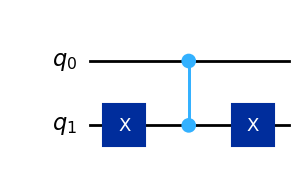

In [15]:
# Applies Oracle to the Grimoire 1
def second_grimoire():
    circ = QuantumCircuit(2)
    circ.x(1)
    circ.cz(0,1)
    circ.x(1)
    
    return circ

circ = second_grimoire()
circ.draw(output='mpl', style="iqp")

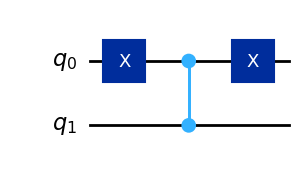

In [16]:
# Applies Oracle to the Grimoire 2
def third_grimoire():
    circ = QuantumCircuit(2)
    circ.x(0)
    circ.cz(0,1)
    circ.x(0)
    
    return circ

circ = third_grimoire()
circ.draw(output='mpl', style="iqp")

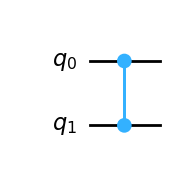

In [17]:
# Applies Oracle to the Grimoire 3
def fourth_grimoire():
    circ = QuantumCircuit(2)
    circ.cz(0,1)

    
    return circ

circ = fourth_grimoire()
circ.draw(output='mpl', style="iqp")

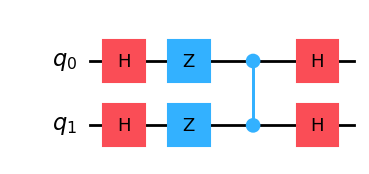

In [18]:
def diffuse_circuit():
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.h(1)
    
    circ.z(0)
    circ.z(1)
    
    circ.cz(0, 1)
    
    circ.h(0)
    circ.h(1)
    
    return circ

circ = diffuse_circuit()
circ.draw(output='mpl', style="iqp")

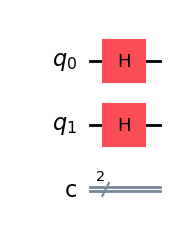

In [19]:

def base_circuit(): 
    qCircuit = QuantumCircuit(2, 2)
    
    qCircuit.h(0)
    qCircuit.h(1)

    return qCircuit

circ = base_circuit()
circ.draw(output='mpl', style="iqp")

In [20]:



# Définition de la fonction permettant de tester chacun des grimoires un par un 
def check_grimoire(grimoire_circuit):
    circ = base_circuit()

    # Add the Grimoire
    grimoire_gate = grimoire_circuit.to_gate()
    circ.append(grimoire_gate, [0, 1])

    # Add the diffuse
    diffuseur_gate = diffuse_circuit().to_gate()
    circ.append(diffuseur_gate, [0, 1])

    circ.measure_all()

    return circ



In [21]:


def simulate(circ):
    simulator = Aer.get_backend('aer_simulator')
    transpilator = transpile(circ, simulator)
    
    return simulator.run(transpilator).result().get_counts()



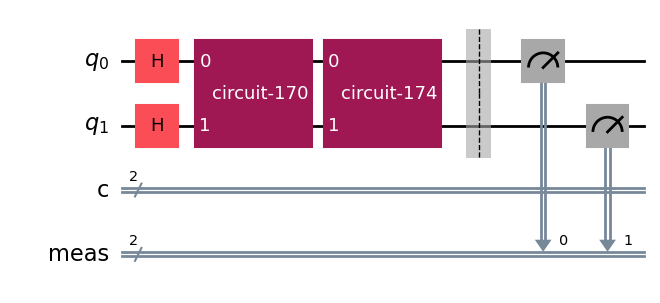

In [22]:


# Grimoire 0
circ = check_grimoire(first_grimoire())
circ.draw('mpl', style="iqp")



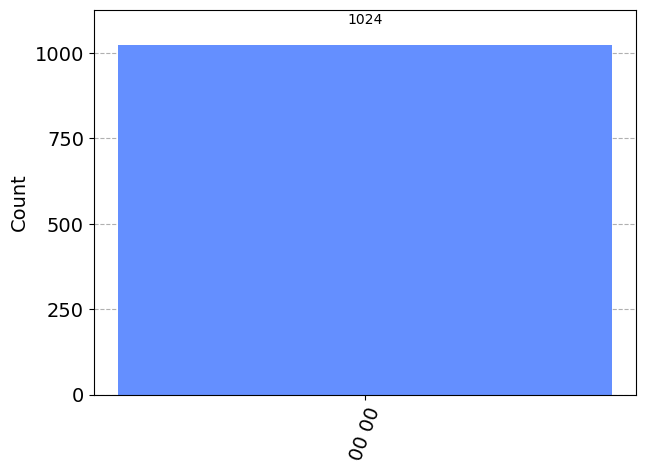

In [23]:
plot_histogram(simulate(circ))

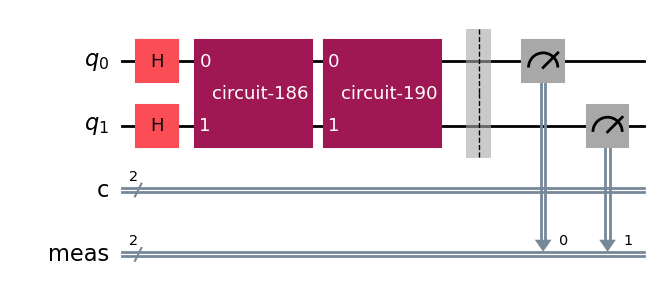

In [24]:
# Grimoire 1
circ = check_grimoire(second_grimoire())
circ.draw('mpl', style="iqp")


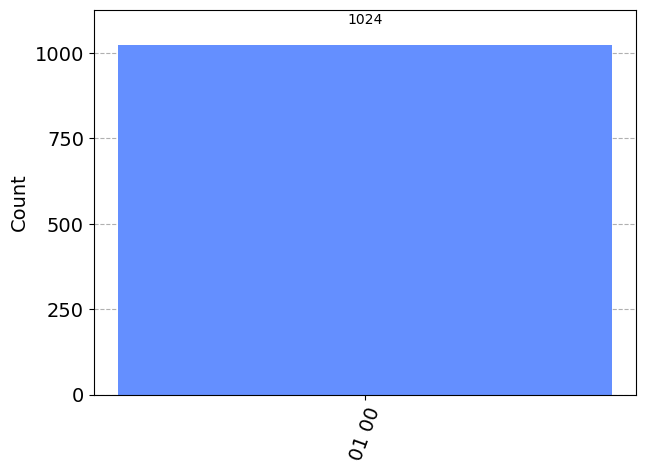

In [25]:
plot_histogram(simulate(circ))

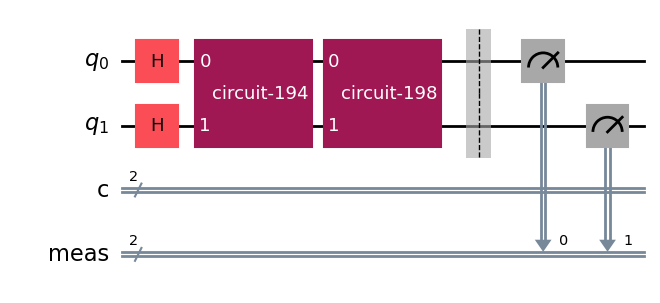

In [26]:
# Grimoire 2
circ = check_grimoire(third_grimoire())
circ.draw('mpl', style="iqp")

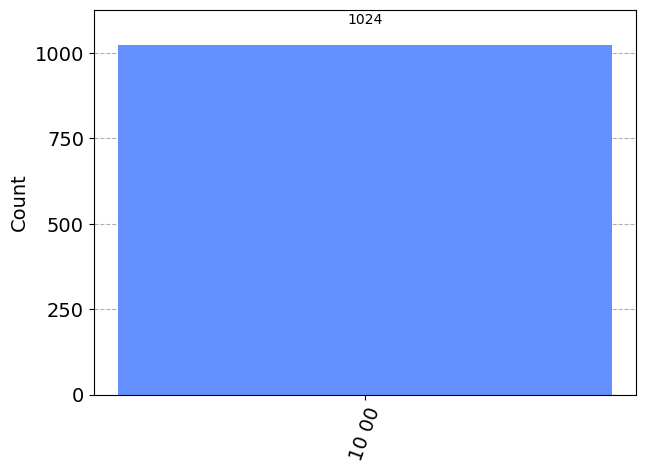

In [27]:
plot_histogram(simulate(circ))

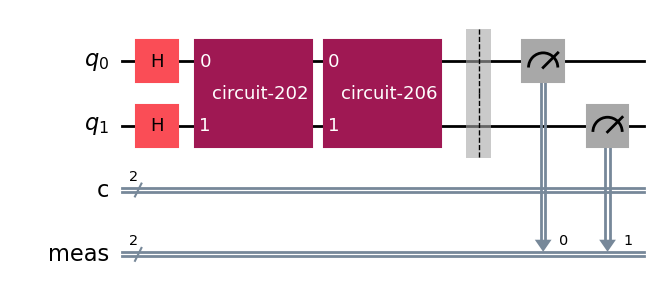

In [28]:
# Grimoire 2
circ = check_grimoire(fourth_grimoire())
circ.draw('mpl', style="iqp")

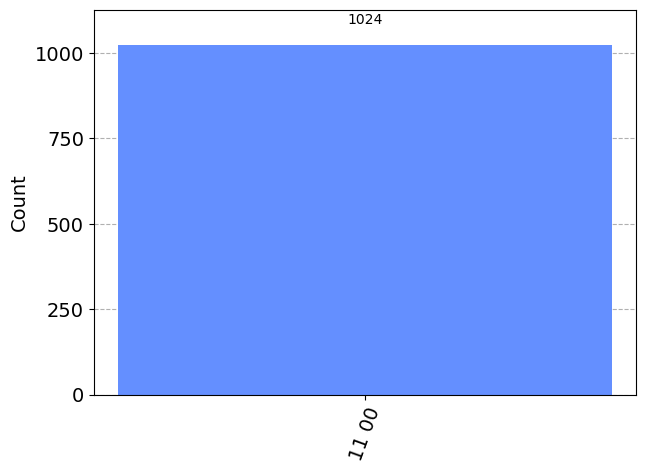

In [29]:
plot_histogram(simulate(circ))

In [30]:
# This shows that we have to follow what the oracle choosed